In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Get the data

In [9]:
# Re-reading the data to test the function
import os
os.chdir(r'C:\Users\alber\OneDrive\Desktop\IronHAck\LABS\lab-customer-analysis-round-2\files_for_lab\csv_files')
df = pd.read_csv('marketing_customer_analysis.csv')

df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


## Dealing with the data

In [22]:
def big_clean(df):

    # Standardize column names
    df.columns = df.columns.str.lower()

    # Clean NaN values & extra index column. Will replace all NaN by the mode in this case
    for column in df.columns:
        if (df[column].isna().sum() / df.shape[0]) > 0.5:
            df.drop(column, axis = 1, inplace = True)
        elif (df[column].isna().sum() > 0):
            if df[column].dtypes == object:
                df[column] = df[column].fillna(df[column].mode()[0])
            else:
                df[column] = df[column].fillna(np.mean(df[column]))
    
    return big_clean(df)

# Checking if the formula works
df

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,40,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,68,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,63,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,27,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


## Explore the data

In [12]:
def data_exploration (df):
    df_info = df.info() 
    summary = df.describe()
    summary = summary.apply(round)
    correlation = df.corr()
    
    
    return df_info, summary, correlation

In [13]:
data_exploration(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed: 0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer lifetime value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective to date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location code                  10910 non-null  object 
 12  marital status                 10910 non-null 

(None,
        unnamed: 0  customer lifetime value   income  monthly premium auto  \
 count     10910.0                  10910.0  10910.0               10910.0   
 mean       5454.0                   8018.0  37536.0                  93.0   
 std        3150.0                   6885.0  30359.0                  34.0   
 min           0.0                   1898.0      0.0                  61.0   
 25%        2727.0                   4014.0      0.0                  68.0   
 50%        5454.0                   5771.0  33814.0                  83.0   
 75%        8182.0                   8993.0  62251.0                 109.0   
 max       10909.0                  83325.0  99981.0                 298.0   
 
        months since last claim  months since policy inception  \
 count                  10910.0                        10910.0   
 mean                      15.0                           48.0   
 std                       10.0                           28.0   
 min                     

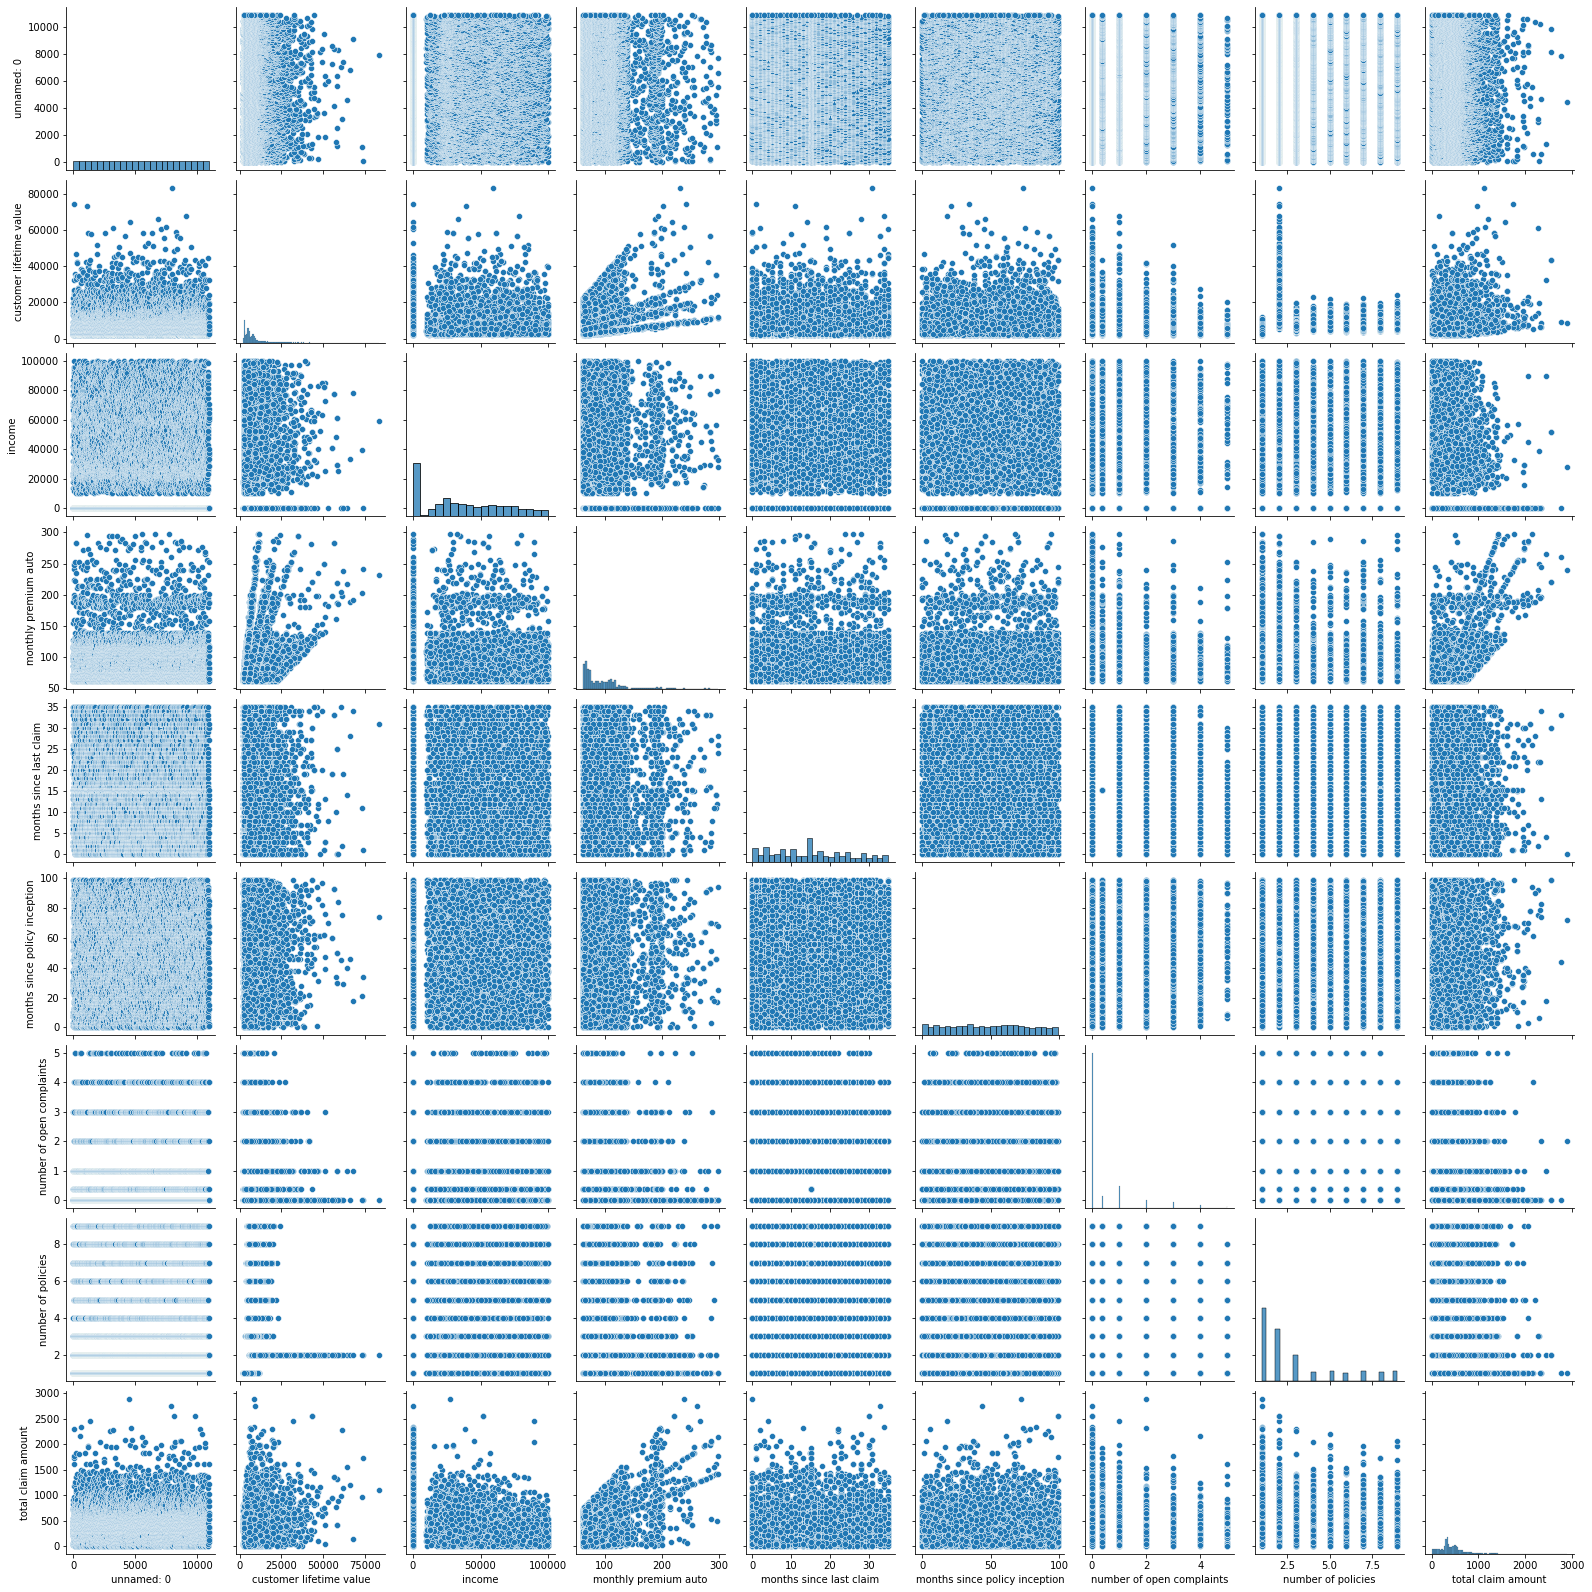

In [14]:
sns.pairplot(df)

## Processing Data

### X-y split.

In [15]:
y_col = 'total claim amount'
y = df[y_col]
X = df[df.columns.drop(y_col)]

In [16]:
X

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,7.000000,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,3.000000,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,34.000000,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,10.000000,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,15.149071,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,15.149071,40,0.384256,7,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,7.000000,68,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,11.000000,63,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,0.000000,27,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [17]:
y

0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10905    1214.400000
10906     273.018929
10907     381.306996
10908     618.288849
10909    1021.719397
Name: total claim amount, Length: 10910, dtype: float64

### Normalize (numerical)

In [19]:
numbers = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical = df.select_dtypes(include=numbers)

categorical = df.select_dtypes(exclude=numbers)

display(numerical)

display(categorical)

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849


,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [20]:
def mean_norm(numerical):
    return numerical.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

    numer_norm = mean_norm(numerical)
    return(numer_norm)

In [21]:
mean_norm(numerical)

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,-1.731813,-0.466084,0.345619,-0.934776,-8.329385e-01,0.139870,-4.338991e-01,2.509340,-0.486303
1,-1.731495,-0.840907,-1.236406,-0.847675,-1.241789e+00,-0.790673,-4.338991e-01,-0.824884,1.061111
2,-1.731178,1.006477,-0.507170,0.197545,1.926804e+00,-0.611722,-4.338991e-01,-0.408106,0.154397
3,-1.730860,2.079017,0.380172,0.110443,-5.263004e-01,-1.613846,-4.338991e-01,-0.408106,0.168133
4,-1.730543,0.146233,-0.456576,0.691121,-1.525156e-14,-0.611722,5.390718e-15,1.675784,0.934481
...,...,...,...,...,...,...,...,...,...
10905,1.730543,1.095866,-1.236406,4.639727,-1.525156e-14,-0.289611,5.390718e-15,1.675784,2.667911
10906,1.730860,-0.400692,0.777679,-0.818641,-8.329385e-01,0.712512,-4.338991e-01,1.259006,-0.554005
10907,1.731178,2.305719,0.075783,3.129966,-4.240877e-01,0.533561,-4.338991e-01,-0.408106,-0.183384
10908,1.731495,0.574247,0.878110,1.881509,-1.548427e+00,-0.754883,4.082870e+00,1.259006,0.627696
